In [15]:
#Main libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
import os

In [17]:
os.listdir('..')

['archive (2)', 'Foto Turra']

from os import listdir 

In [18]:
os.getcwd()

'C:\\Users\\elide\\Desktop\\ESAME PROGRAMMING\\archive (2)'

In [19]:
import os

directory = os.getcwd()
print("The current working directory of the file is : ", directory)
os.chdir("C:/Users/elide/Desktop/ESAME PROGRAMMING/archive (2)")
directory2 = os.getcwd()
print("The current working directory of the file is : ", directory2)

The current working directory of the file is :  C:\Users\elide\Desktop\ESAME PROGRAMMING\archive (2)
The current working directory of the file is :  C:\Users\elide\Desktop\ESAME PROGRAMMING\archive (2)


----

# Global Trends in Mental Health Disorders

Let's open the dataset "Global Trends in Mental Health Disorders" from Kaggle. 

The description is the following: 
"This dataset contains informative data from countries across the globe about the prevalence of mental health disorders including schizophrenia, bipolar disorder, eating disorders, anxiety disorders, drug use disorders, depression and alcohol use disorders."

The data is collected through an Excel file.

In [20]:
data_df = pd.read_csv('Mental health Depression disorder Data.csv')

C:\Users\elide\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
#Beginning of the dataframe. We can see the columns "index", "Entity", "Code", "Year" and then all the disorder rates.
data_df.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


We can start by eliminate the column "index", as it shows the same values of the indexes of the tables.
We can also change the column name "Entity" with "Country", as it represents countries for which we have the mental health rates.

In [23]:
data_df.pop('index')
data_df.rename(columns={"Entity": "Country"}, inplace=True)
data_df

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


We can check the infos of the dataframe, in particular we look at the types of the different fields.

In [24]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Country                    108553 non-null  object 
 1   Code                       103141 non-null  object 
 2   Year                       108553 non-null  object 
 3   Schizophrenia (%)          25875 non-null   object 
 4   Bipolar disorder (%)       19406 non-null   object 
 5   Eating disorders (%)       100236 non-null  object 
 6   Anxiety disorders (%)      6468 non-null    float64
 7   Drug use disorders (%)     6468 non-null    float64
 8   Depression (%)             6468 non-null    float64
 9   Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), object(6)
memory usage: 8.3+ MB


The first thing that we notice is the fact that the column "Code" has more null values that the column "Entity". Why?

In [25]:
data_df[data_df['Code'].isnull()]['Country'].unique()

array(['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia',
       'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central Sub-Saharan Africa', 'East Asia',
       'Eastern Europe', 'Eastern Sub-Saharan Africa', 'England',
       'High SDI', 'High-income', 'High-income Asia Pacific',
       'High-middle SDI', 'Latin America and Caribbean', 'Low SDI',
       'Low-middle SDI', 'Middle SDI', 'North Africa and Middle East',
       'North America', 'Northern Ireland', 'Oceania', 'Scotland',
       'South Asia', 'Southeast Asia',
       'Southeast Asia, East Asia, and Oceania', 'Southern Latin America',
       'Southern Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Tropical Latin America', 'Wales', 'Western Europe',
       'Western Sub-Saharan Africa', 'Africa', 'Asia', 'Europe',
       'Latin America', 'Saint Barthlemy'], dtype=object)

The reason is that there are a lot of values that are not actually countries, but they might be region or continents. We choose this type of data, to standardize the results for only countries. 

In [26]:
list_not_countries=list(data_df[data_df['Code'].isnull()]['Country'].unique())

In [27]:
data_df=data_df[~data_df.Country.str.contains('|'.join(list_not_countries))]
data_df=data_df.reset_index()
data_df

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
102144,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
102145,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
102146,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
102147,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data_df[data_df['Code'].isnull()]['Country'].unique() #OK

array([], dtype=object)

In [29]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102149 entries, 0 to 102148
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      102149 non-null  int64  
 1   Country                    102149 non-null  object 
 2   Code                       102149 non-null  object 
 3   Year                       102149 non-null  object 
 4   Schizophrenia (%)          21731 non-null   object 
 5   Bipolar disorder (%)       16298 non-null   object 
 6   Eating disorders (%)       96716 non-null   object 
 7   Anxiety disorders (%)      5432 non-null    float64
 8   Drug use disorders (%)     5432 non-null    float64
 9   Depression (%)             5432 non-null    float64
 10  Alcohol use disorders (%)  5432 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 8.6+ MB


The numbers of "non-null" values still differ a lot between columns. The last 4 columns have only 5432 "non-null" values. We should investigate this particularity.

We can also see that the columns 'Country', 'Code', 'Year', 'Schizophrenia (%)', 'Bipolar Disorder (%)' and 'Eating Disorder (%)' are listed as objects, while 'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)' and 'Alcohol use disorders (%)' are float.

This is strange, as we expect to find all the fields that refer to a rate as float type.

In [30]:
data_df

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
102144,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
102145,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
102146,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
102147,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


Another particular point is that the last values for the column 'Schizophrenia (%)' don't look like percentages at all.

To find the anormality, we can focus only on this column for now. Since we expect it to be a percentage, let's try to transform it to a number.

In [31]:
data_df['Schizophrenia (%)'] = pd.to_numeric(data_df['Schizophrenia (%)'])

ValueError: Unable to parse string "Prevalence in males (%)" at position 5432

The function gave us an error and it indicates an outlier at position 5432. Let's look at that row more in detail.

In [32]:
data_df.iloc[5432]

index                                             6468
Country                                         Entity
Code                                              Code
Year                                              Year
Schizophrenia (%)              Prevalence in males (%)
Bipolar disorder (%)         Prevalence in females (%)
Eating disorders (%)                        Population
Anxiety disorders (%)                              NaN
Drug use disorders (%)                             NaN
Depression (%)                                     NaN
Alcohol use disorders (%)                          NaN
Name: 5432, dtype: object

This row's values contains all strings that look like the header for another table. This suggest us that the dataframe is actually made of different tables concatenated to each other, that can give us more information about our topic. We must divide them and study them as singular tables.

In [33]:
data1=data_df[:5432] #First table
data1

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
5427,6463,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
5428,6464,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
5429,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
5430,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


This first table contains the name, the code of the country and the mental health rates for year in the population. The rate is calculated by dividing the number of people affected with a certain mental disorder with the the total of the population in that year. It can also be called "prevalence".

In [21]:
data_df[5432:]

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
5432,6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
5433,6469,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
5434,6470,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN
5435,6471,Afghanistan,AFG,1802,NaN,NaN,3280000,NaN,NaN,NaN,NaN
5436,6472,Afghanistan,AFG,1803,NaN,NaN,3280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
102144,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
102145,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
102146,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
102147,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the last values for the prevalence in males, we think that there is probabily at least one other table to isolate. 
We will search for another value "Entity" in the "Country" column.

In [34]:
data_df[data_df['Country']=='Entity']

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
5432,6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
51074,54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)",Depressive disorder rates (number suffering pe...,Population,NaN,NaN,NaN,NaN
96716,102084,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both ...,NaN,NaN,NaN,NaN,NaN,NaN


From this last code, we can see that we have 4 different tables in our source dataset.

In [35]:
data2=data_df[5432:51074]
data2

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
5432,6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
5433,6469,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
5434,6470,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN
5435,6471,Afghanistan,AFG,1802,NaN,NaN,3280000,NaN,NaN,NaN,NaN
5436,6472,Afghanistan,AFG,1803,NaN,NaN,3280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
51069,54271,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000,NaN,NaN,NaN,NaN
51070,54272,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000,NaN,NaN,NaN,NaN
51071,54273,Zimbabwe,ZWE,2017,2.812022,3.50086,14237000.000000,NaN,NaN,NaN,NaN
51072,54274,Zimbabwe,ZWE,2018,NaN,NaN,14439000.000000,NaN,NaN,NaN,NaN


The second table contains value referring to the prevalences in males and females, which means the value of males and females with disorders relative to the total of the population.

In [36]:
data3=data_df[51074:96716]
data3

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
51074,54276,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)",Depressive disorder rates (number suffering pe...,Population,NaN,NaN,NaN,NaN
51075,54277,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
51076,54278,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN
51077,54279,Afghanistan,AFG,1802,NaN,NaN,3280000,NaN,NaN,NaN,NaN
51078,54280,Afghanistan,AFG,1803,NaN,NaN,3280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
96711,102079,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0,NaN,NaN,NaN,NaN
96712,102080,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0,NaN,NaN,NaN,NaN
96713,102081,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000.0,NaN,NaN,NaN,NaN
96714,102082,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN,NaN,NaN,NaN


This third table refers to suicide rate (deaths per 100,000 individuals) and depressive disorder rates (number suffering per 100,000) in the examinated countries for year.

In [37]:
data4=data_df[96716:]
data4

,index,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
96716,102084,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both ...,NaN,NaN,NaN,NaN,NaN,NaN
96717,102085,Afghanistan,AFG,1990,318435.81367,NaN,NaN,NaN,NaN,NaN,NaN
96718,102086,Afghanistan,AFG,1991,329044.773956,NaN,NaN,NaN,NaN,NaN,NaN
96719,102087,Afghanistan,AFG,1992,382544.572895,NaN,NaN,NaN,NaN,NaN,NaN
96720,102088,Afghanistan,AFG,1993,440381.507393,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
102144,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
102145,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
102146,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
102147,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


Last table contains data for the prevalence for depressive disorders  (people suffering from depression) for both sexes and ages.

# Cleaning of the tables

Now that we have separated all the 4 tables, it's time to "clean" them.

## First table

Let's start with the first table. We can see that column "index" was automatically created. We can eliminate it like we did before.

In [38]:
data1.pop('index')
data1

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
5427,Zimbabwe,ZWE,2013,0.15567,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
5428,Zimbabwe,ZWE,2014,0.155993,0.60861,0.118073,3.093964,0.768914,3.140290,1.515470
5429,Zimbabwe,ZWE,2015,0.156465,0.609363,0.11947,3.098687,0.771802,3.155710,1.514751
5430,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [39]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    5432 non-null   object 
 1   Code                       5432 non-null   object 
 2   Year                       5432 non-null   object 
 3   Schizophrenia (%)          5432 non-null   object 
 4   Bipolar disorder (%)       5432 non-null   object 
 5   Eating disorders (%)       5432 non-null   object 
 6   Anxiety disorders (%)      5432 non-null   float64
 7   Drug use disorders (%)     5432 non-null   float64
 8   Depression (%)             5432 non-null   float64
 9   Alcohol use disorders (%)  5432 non-null   float64
dtypes: float64(4), object(6)
memory usage: 424.5+ KB


We can transform data object in float.

In [40]:
data1['Schizophrenia (%)'] = pd.to_numeric(data1['Schizophrenia (%)'])
data1['Bipolar disorder (%)'] = pd.to_numeric(data1['Bipolar disorder (%)'])
data1['Eating disorders (%)'] = pd.to_numeric(data1['Eating disorders (%)'])

C:\Users\elide\AppData\Local\Temp/ipykernel_11164/4052114349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Schizophrenia (%)'] = pd.to_numeric(data1['Schizophrenia (%)'])
C:\Users\elide\AppData\Local\Temp/ipykernel_11164/4052114349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Bipolar disorder (%)'] = pd.to_numeric(data1['Bipolar disorder (%)'])
C:\Users\elide\AppData\Local\Temp/ipykernel_11164/4052114349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

## Second table

In [41]:
data2.reset_index(inplace=True)
data2.pop('index')
data2.pop('level_0')
data2

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1802,NaN,NaN,3280000,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1803,NaN,NaN,3280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
45637,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000,NaN,NaN,NaN,NaN
45638,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000,NaN,NaN,NaN,NaN
45639,Zimbabwe,ZWE,2017,2.812022,3.50086,14237000.000000,NaN,NaN,NaN,NaN
45640,Zimbabwe,ZWE,2018,NaN,NaN,14439000.000000,NaN,NaN,NaN,NaN


We insert the correct name of the columns and we consider only the the ones useful for our analysis.

In [42]:
new_header = data2.iloc[0] #grab the first row for the header
data2.columns = new_header
data2=data2[1:]

In [43]:
data2=data2[['Entity','Code','Year','Prevalence in males (%)','Prevalence in females (%)','Population']]
data2

,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
1,Afghanistan,AFG,1800,NaN,NaN,3280000
2,Afghanistan,AFG,1801,NaN,NaN,3280000
3,Afghanistan,AFG,1802,NaN,NaN,3280000
4,Afghanistan,AFG,1803,NaN,NaN,3280000
5,Afghanistan,AFG,1804,NaN,NaN,3280000
...,...,...,...,...,...,...
45637,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000
45638,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000
45639,Zimbabwe,ZWE,2017,2.812022,3.50086,14237000.000000
45640,Zimbabwe,ZWE,2018,NaN,NaN,14439000.000000


In [44]:
data2.rename(columns={"Entity": "Country"}, inplace=True)
data2

,Country,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
1,Afghanistan,AFG,1800,NaN,NaN,3280000
2,Afghanistan,AFG,1801,NaN,NaN,3280000
3,Afghanistan,AFG,1802,NaN,NaN,3280000
4,Afghanistan,AFG,1803,NaN,NaN,3280000
5,Afghanistan,AFG,1804,NaN,NaN,3280000
...,...,...,...,...,...,...
45637,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000
45638,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000
45639,Zimbabwe,ZWE,2017,2.812022,3.50086,14237000.000000
45640,Zimbabwe,ZWE,2018,NaN,NaN,14439000.000000


In [45]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45641 entries, 1 to 45641
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    45641 non-null  object
 1   Code                       45641 non-null  object
 2   Year                       45641 non-null  object
 3   Prevalence in males (%)    5432 non-null   object
 4   Prevalence in females (%)  5432 non-null   object
 5   Population                 45641 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


We can see that there are a lot of null values for the data referring to Prevalences. Let's look at them more in details.

In [46]:
data2[data2['Prevalence in males (%)'].isnull()]

,Country,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
1,Afghanistan,AFG,1800,NaN,NaN,3280000
2,Afghanistan,AFG,1801,NaN,NaN,3280000
3,Afghanistan,AFG,1802,NaN,NaN,3280000
4,Afghanistan,AFG,1803,NaN,NaN,3280000
5,Afghanistan,AFG,1804,NaN,NaN,3280000
...,...,...,...,...,...,...
45609,Zimbabwe,ZWE,1987,NaN,NaN,9527000
45610,Zimbabwe,ZWE,1988,NaN,NaN,9849000
45611,Zimbabwe,ZWE,1989,NaN,NaN,10154000.000000
45640,Zimbabwe,ZWE,2018,NaN,NaN,14439000.000000


We can notice that there is a gap between year 1990 and 2017. If we look at the Year more in detail...

In [47]:
data2[data2['Prevalence in males (%)'].notnull()]['Year'].unique() 

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'], dtype=object)

Actually, we have data only from 1990 to 2017. Since it seems more reasonable to work only with this restricted range of years, we choose to eliminate the rows that refer to other years.

In [48]:
range_years=list(data2[data2['Prevalence in males (%)'].notnull()]['Year'].unique())
data2=data2[data2.Year.str.contains('|'.join(range_years))]
data2=data2.reset_index()
data2.pop('index')
data2

,Country,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
0,Afghanistan,AFG,1990,3.499982,4.647815,12412000.000000
1,Afghanistan,AFG,1991,3.503947,4.655772,13299000.000000
2,Afghanistan,AFG,1992,3.508912,4.662066,14486000.000000
3,Afghanistan,AFG,1993,3.513429,4.669012,15817000.000000
4,Afghanistan,AFG,1994,3.515578,4.67305,17076000.000000
...,...,...,...,...,...,...
6520,Zimbabwe,ZWE,2013,2.769193,3.424106,13350000.000000
6521,Zimbabwe,ZWE,2014,2.778101,3.437674,13587000.000000
6522,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000
6523,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000


In [49]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    6525 non-null   object
 1   Code                       6525 non-null   object
 2   Year                       6525 non-null   object
 3   Prevalence in males (%)    5432 non-null   object
 4   Prevalence in females (%)  5432 non-null   object
 5   Population                 6525 non-null   object
dtypes: object(6)
memory usage: 306.0+ KB


There are other null values for the prevalences.

In [50]:
data2[data2['Prevalence in males (%)'].isnull()]

,Country,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
168,Anguilla,AIA,1990,NaN,NaN,9000
169,Anguilla,AIA,1991,NaN,NaN,9000
170,Anguilla,AIA,1992,NaN,NaN,9000
171,Anguilla,AIA,1993,NaN,NaN,9000
172,Anguilla,AIA,1994,NaN,NaN,10000
...,...,...,...,...,...,...
6408,Western Sahara,ESH,2014,NaN,NaN,515000
6409,Western Sahara,ESH,2015,NaN,NaN,526000
6410,Western Sahara,ESH,2016,NaN,NaN,539000
6411,Western Sahara,ESH,2017,NaN,NaN,553000


The problem might be reffering to other countries that have a code, but they aren't actually countries, or are very little (like Monaco, San Marino and Vatican).

In [51]:
data2[data2['Prevalence in males (%)'].isnull()]['Country'].unique()

array(['Anguilla', 'Aruba', 'Bonaire Sint Eustatius and Saba',
       'British Virgin Islands', 'Cayman Islands', 'Channel Islands',
       'Cook Islands', 'Curacao', 'Faeroe Islands', 'Falkland Islands',
       'French Guiana', 'French Polynesia', 'Gibraltar', 'Guadeloupe',
       'Hong Kong', 'Isle of Man', 'Liechtenstein', 'Macao', 'Martinique',
       'Mayotte', 'Monaco', 'Montserrat', 'Nauru', 'New Caledonia',
       'Niue', 'Palau', 'Reunion', 'Saint Helena',
       'Saint Kitts and Nevis', 'Saint Martin (French part)',
       'Saint Pierre and Miquelon', 'San Marino',
       'Sint Maarten (Dutch part)', 'Tokelau', 'Turks and Caicos Islands',
       'Tuvalu', 'Vatican', 'Wallis and Futuna', 'Western Sahara',
       'World'], dtype=object)

In [52]:
list_not_countries2=list(data2[data2['Prevalence in males (%)'].isnull()]['Country'].unique())

We choose to eliminate data referring to this countries.

In [54]:
data2=data2[~data2.Country.str.contains('|'.join(list_not_countries2))]
data2=data2.reset_index()
data2.pop('index')
data2

C:\Users\elide\AppData\Local\Temp/ipykernel_16744/2491387250.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  data2=data2[~data2.Country.str.contains('|'.join(list_not_countries2))]


,Country,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
0,Afghanistan,AFG,1990,3.499982,4.647815,12412000.000000
1,Afghanistan,AFG,1991,3.503947,4.655772,13299000.000000
2,Afghanistan,AFG,1992,3.508912,4.662066,14486000.000000
3,Afghanistan,AFG,1993,3.513429,4.669012,15817000.000000
4,Afghanistan,AFG,1994,3.515578,4.67305,17076000.000000
...,...,...,...,...,...,...
5455,Zimbabwe,ZWE,2013,2.769193,3.424106,13350000.000000
5456,Zimbabwe,ZWE,2014,2.778101,3.437674,13587000.000000
5457,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000
5458,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000


In [57]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5404 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    5404 non-null   object
 1   Code                       5404 non-null   object
 2   Year                       5404 non-null   object
 3   Prevalence in males (%)    5404 non-null   object
 4   Prevalence in females (%)  5404 non-null   object
 5   Population                 5404 non-null   object
dtypes: object(6)
memory usage: 295.5+ KB


In [51]:
#data2[data2['Prevalence in males (%)'].isnull()] ##perché non li elimina??????

,Country,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
168,Anguilla,AIA,1990,NaN,NaN,9000
169,Anguilla,AIA,1991,NaN,NaN,9000
170,Anguilla,AIA,1992,NaN,NaN,9000
171,Anguilla,AIA,1993,NaN,NaN,9000
172,Anguilla,AIA,1994,NaN,NaN,10000
...,...,...,...,...,...,...
6408,Western Sahara,ESH,2014,NaN,NaN,515000
6409,Western Sahara,ESH,2015,NaN,NaN,526000
6410,Western Sahara,ESH,2016,NaN,NaN,539000
6411,Western Sahara,ESH,2017,NaN,NaN,553000


In [53]:
#Facciamo finta lo abbia fatto...
#data2=data2.dropna()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 6524
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    5432 non-null   object
 1   Code                       5432 non-null   object
 2   Year                       5432 non-null   object
 3   Prevalence in males (%)    5432 non-null   object
 4   Prevalence in females (%)  5432 non-null   object
 5   Population                 5432 non-null   object
dtypes: object(6)
memory usage: 297.1+ KB


In [159]:
data2['Prevalence in males (%)'] = pd.to_numeric(data2['Prevalence in males (%)'])
data2['Prevalence in females (%)'] = pd.to_numeric(data2['Prevalence in females (%)'])
data2['Population'] = pd.to_numeric(data2['Population'])

C:\Users\elide\AppData\Local\Temp/ipykernel_11164/2620682831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Prevalence in males (%)'] = pd.to_numeric(data2['Prevalence in males (%)'])
C:\Users\elide\AppData\Local\Temp/ipykernel_11164/2620682831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Prevalence in females (%)'] = pd.to_numeric(data2['Prevalence in females (%)'])
C:\Users\elide\AppData\Local\Temp/ipykernel_11164/2620682831.py:3: SettingWithCopyWarning: 
A value is trying to be 

## Third table

In [54]:
data3=data3.reset_index()
data3.pop('index')
data3.pop('level_0')
data3

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)",Depressive disorder rates (number suffering pe...,Population,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1802,NaN,NaN,3280000,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1803,NaN,NaN,3280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
45637,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0,NaN,NaN,NaN,NaN
45638,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0,NaN,NaN,NaN,NaN
45639,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000.0,NaN,NaN,NaN,NaN
45640,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN,NaN,NaN,NaN


In [55]:
new_header = data3.iloc[0] #grab the first row for the header
data3.columns = new_header
data3=data3[1:]

In [56]:
data3=data3[['Entity','Code','Year','Suicide rate (deaths per 100,000 individuals)','Depressive disorder rates (number suffering per 100,000)','Population']]
data3

,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
1,Afghanistan,AFG,1800,NaN,NaN,3280000
2,Afghanistan,AFG,1801,NaN,NaN,3280000
3,Afghanistan,AFG,1802,NaN,NaN,3280000
4,Afghanistan,AFG,1803,NaN,NaN,3280000
5,Afghanistan,AFG,1804,NaN,NaN,3280000
...,...,...,...,...,...,...
45637,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0
45638,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0
45639,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000.0
45640,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0


In [57]:
data3.rename(columns={"Entity": "Country"}, inplace=True)
data3

,Country,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
1,Afghanistan,AFG,1800,NaN,NaN,3280000
2,Afghanistan,AFG,1801,NaN,NaN,3280000
3,Afghanistan,AFG,1802,NaN,NaN,3280000
4,Afghanistan,AFG,1803,NaN,NaN,3280000
5,Afghanistan,AFG,1804,NaN,NaN,3280000
...,...,...,...,...,...,...
45637,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0
45638,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0
45639,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000.0
45640,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0


In [58]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45641 entries, 1 to 45641
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Country                                                   45641 non-null  object
 1   Code                                                      45641 non-null  object
 2   Year                                                      45641 non-null  object
 3   Suicide rate (deaths per 100,000 individuals)             5432 non-null   object
 4   Depressive disorder rates (number suffering per 100,000)  5432 non-null   object
 5   Population                                                45641 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [59]:
list_not_countries3=list(data3[data3['Suicide rate (deaths per 100,000 individuals)'].isnull()]['Country'].unique())

In [60]:
data3=data3[~data3.Country.str.contains('|'.join(list_not_countries2))]
data3=data3.reset_index()
data3.pop('index')
data3

C:\Users\elide\AppData\Local\Temp/ipykernel_11164/422284689.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  data3=data3[~data3.Country.str.contains('|'.join(list_not_countries2))]


,Country,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
0,Afghanistan,AFG,1800,NaN,NaN,3280000
1,Afghanistan,AFG,1801,NaN,NaN,3280000
2,Afghanistan,AFG,1802,NaN,NaN,3280000
3,Afghanistan,AFG,1803,NaN,NaN,3280000
4,Afghanistan,AFG,1804,NaN,NaN,3280000
...,...,...,...,...,...,...
41545,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0
41546,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0
41547,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000.0
41548,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0


In [61]:
range_years=list(data3[data3['Suicide rate (deaths per 100,000 individuals)'].notnull()]['Year'].unique())

In [62]:
data3=data3[data3.Year.str.contains('|'.join(range_years))]
data3=data3.reset_index()
data3.pop('index')
data3

,Country,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
0,Afghanistan,AFG,1990,10.318504,4039.755763,12412000.000000
1,Afghanistan,AFG,1991,10.32701,4046.256034,13299000.000000
2,Afghanistan,AFG,1992,10.271411,4053.709902,14486000.000000
3,Afghanistan,AFG,1993,10.376123,4060.203474,15817000.000000
4,Afghanistan,AFG,1994,10.575915,4062.290365,17076000.000000
...,...,...,...,...,...,...
5455,Zimbabwe,ZWE,2013,28.3612,3048.264249,13350000.0
5456,Zimbabwe,ZWE,2014,27.605547,3056.996704,13587000.0
5457,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0
5458,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0


In [63]:
#data3.info() #Non funzia... ma facciamo finta di sì
data3=data3.dropna()
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5404 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Country                                                   5404 non-null   object
 1   Code                                                      5404 non-null   object
 2   Year                                                      5404 non-null   object
 3   Suicide rate (deaths per 100,000 individuals)             5404 non-null   object
 4   Depressive disorder rates (number suffering per 100,000)  5404 non-null   object
 5   Population                                                5404 non-null   object
dtypes: object(6)
memory usage: 295.5+ KB


In [72]:
#data3[data3['Suicide rate (deaths per 100,000 individuals)'].isnull()]

In [65]:
data3['Suicide rate (deaths per 100,000 individuals)'] = pd.to_numeric(data3['Suicide rate (deaths per 100,000 individuals)'])
data3['Depressive disorder rates (number suffering per 100,000)'] = pd.to_numeric(data3['Depressive disorder rates (number suffering per 100,000)'])
data3['Population'] = pd.to_numeric(data3['Population'])

C:\Users\elide\AppData\Local\Temp/ipykernel_11164/2317715174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Suicide rate (deaths per 100,000 individuals)'] = pd.to_numeric(data3['Suicide rate (deaths per 100,000 individuals)'])
C:\Users\elide\AppData\Local\Temp/ipykernel_11164/2317715174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Depressive disorder rates (number suffering per 100,000)'] = pd.to_numeric(data3['Depressive disorder rates (number suffering per 100,000)'])
C:\Users\e

## Fourth table

In [66]:
data4=data4.reset_index()
data4.pop('index')
data4.pop('level_0')
data4

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both ...,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,318435.81367,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1991,329044.773956,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1992,382544.572895,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1993,440381.507393,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5428,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
5429,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
5430,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
5431,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
new_header = data4.iloc[0] #grab the first row for the header
data4.columns = new_header
data4=data4[1:]

In [68]:
data4=data4[['Entity','Code','Year','Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)']]
data4

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
1,Afghanistan,AFG,1990,318435.81367
2,Afghanistan,AFG,1991,329044.773956
3,Afghanistan,AFG,1992,382544.572895
4,Afghanistan,AFG,1993,440381.507393
5,Afghanistan,AFG,1994,456916.645489
...,...,...,...,...
5428,Zimbabwe,ZWE,2013,303564.60359
5429,Zimbabwe,ZWE,2014,311665.769283
5430,Zimbabwe,ZWE,2015,320638.507158
5431,Zimbabwe,ZWE,2016,330437.353798


In [69]:
data4.info() #OK!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 1 to 5432
Data columns (total 4 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Entity                                                                                                     5432 non-null   object
 1   Code                                                                                                       5432 non-null   object
 2   Year                                                                                                       5432 non-null   object
 3   Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)  5432 non-null   object
dtypes: object(4)
memory usage: 169.9+ KB


In [70]:
data4['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'] = pd.to_numeric(data4['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'])

# OK QUINDI

In [71]:
data1

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
5427,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
5428,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
5429,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
5430,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [72]:
data2

,Country,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
0,Afghanistan,AFG,1990,3.499982,4.647815,12412000.000000
1,Afghanistan,AFG,1991,3.503947,4.655772,13299000.000000
2,Afghanistan,AFG,1992,3.508912,4.662066,14486000.000000
3,Afghanistan,AFG,1993,3.513429,4.669012,15817000.000000
4,Afghanistan,AFG,1994,3.515578,4.67305,17076000.000000
...,...,...,...,...,...,...
6520,Zimbabwe,ZWE,2013,2.769193,3.424106,13350000.000000
6521,Zimbabwe,ZWE,2014,2.778101,3.437674,13587000.000000
6522,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000
6523,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000


In [73]:
data3

,Country,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
0,Afghanistan,AFG,1990,10.318504,4039.755763,12412000.0
1,Afghanistan,AFG,1991,10.327010,4046.256034,13299000.0
2,Afghanistan,AFG,1992,10.271411,4053.709902,14486000.0
3,Afghanistan,AFG,1993,10.376123,4060.203474,15817000.0
4,Afghanistan,AFG,1994,10.575915,4062.290365,17076000.0
...,...,...,...,...,...,...
5455,Zimbabwe,ZWE,2013,28.361200,3048.264249,13350000.0
5456,Zimbabwe,ZWE,2014,27.605547,3056.996704,13587000.0
5457,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0
5458,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0


In [74]:
data4

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
1,Afghanistan,AFG,1990,318435.813670
2,Afghanistan,AFG,1991,329044.773956
3,Afghanistan,AFG,1992,382544.572895
4,Afghanistan,AFG,1993,440381.507393
5,Afghanistan,AFG,1994,456916.645489
...,...,...,...,...
5428,Zimbabwe,ZWE,2013,303564.603590
5429,Zimbabwe,ZWE,2014,311665.769283
5430,Zimbabwe,ZWE,2015,320638.507158
5431,Zimbabwe,ZWE,2016,330437.353798


# DATA EXPLORATION

In [76]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Schizophrenia (%),5432.0,0.208640,0.041943,0.146902,0.180496,0.198636,0.231277,0.375110
Bipolar disorder (%),5432.0,0.717974,0.164725,0.314535,0.615974,0.695952,0.832384,1.206597
Eating disorders (%),5432.0,0.234912,0.154588,0.073908,0.122150,0.180378,0.281199,0.943991
Anxiety disorders (%),5432.0,3.950291,1.139494,2.023393,3.175469,3.515140,4.663524,8.967330
Drug use disorders (%),5432.0,0.833378,0.442288,0.383650,0.524264,0.709090,0.905551,3.452476
Depression (%),5432.0,3.469310,0.672731,2.139903,2.948142,3.455252,3.870508,6.602754
Alcohol use disorders (%),5432.0,1.562450,0.866337,0.446940,0.956440,1.465286,1.859940,5.474668


In [162]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Prevalence in males (%),5432.0,2.788720e+00,5.494985e-01,1.594129,2.393790e+00,2.746781e+00,3.095842e+00,4.905163e+00
Prevalence in females (%),5432.0,4.121057e+00,8.620765e-01,2.348094,3.471064e+00,4.155466e+00,4.583595e+00,8.537801e+00
Population,5432.0,6.598264e+07,4.780083e+08,45000.000000,1.637000e+06,6.832500e+06,2.156625e+07,7.547859e+09


array([[<AxesSubplot:title={'center':'Schizophrenia (%)'}>,
        <AxesSubplot:title={'center':'Bipolar disorder (%)'}>,
        <AxesSubplot:title={'center':'Eating disorders (%)'}>],
       [<AxesSubplot:title={'center':'Anxiety disorders (%)'}>,
        <AxesSubplot:title={'center':'Drug use disorders (%)'}>,
        <AxesSubplot:title={'center':'Depression (%)'}>],
       [<AxesSubplot:title={'center':'Alcohol use disorders (%)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

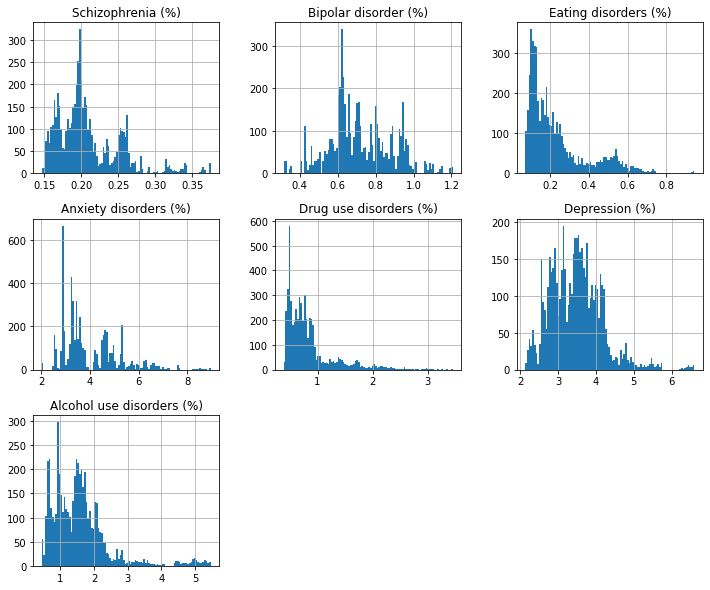

In [77]:
data1.hist(figsize=(12,10), bins=100)

In [78]:
equal_to_max_mask = data1['Anxiety disorders (%)'] == data1['Anxiety disorders (%)'].max()
data1[equal_to_max_mask] #Maximum value for Anxiety disorder

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
3428,New Zealand,NZL,2002,0.339223,1.195859,0.635264,8.96733,2.141658,4.125419,1.447662


In [79]:
equal_to_max_mask = data1['Depression (%)'] == data1['Depression (%)'].max()
data1[equal_to_max_mask] #Maximum value for Depression

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
1881,Greenland,GRL,1995,0.315753,0.590903,0.47654,5.648279,1.678836,6.602754,3.489129


In [84]:
italian_data=data1[data1['Country']=='Italy']
french_data=data1[data1['Country']=='France']
german_data=data1[data1['Country']=='Germany']
english_data=data1[data1['Country']=='United Kingdom']

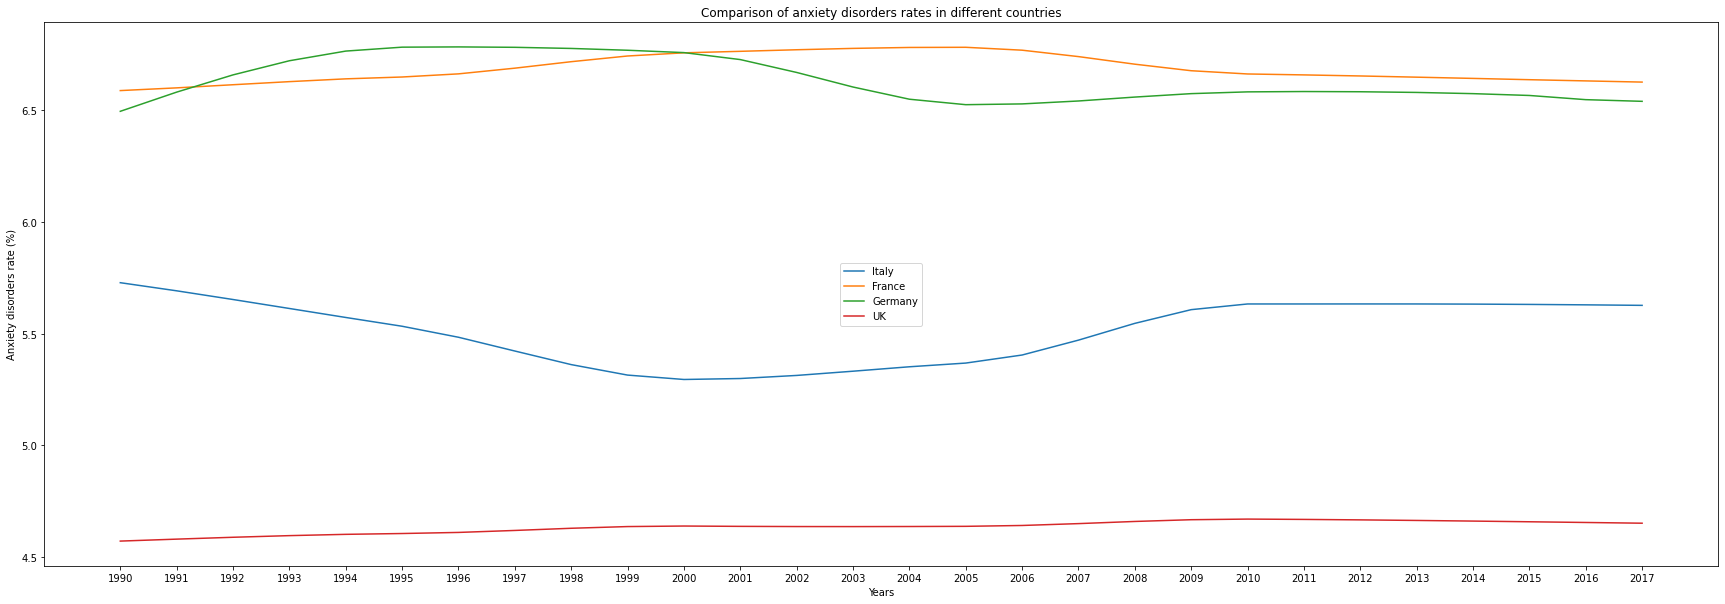

In [91]:
plt.figure(figsize=(30, 10))
plt.title('Comparison of anxiety disorders rates in different countries')
plt.plot(italian_data['Year'], italian_data['Anxiety disorders (%)'], label='Italy')
plt.plot(french_data['Year'], french_data['Anxiety disorders (%)'], label='France')
plt.plot(german_data['Year'], german_data['Anxiety disorders (%)'], label='Germany')
plt.plot(english_data['Year'], english_data['Anxiety disorders (%)'], label='UK')
plt.xlabel('Years')
plt.ylabel('Anxiety disorders rate (%)')
plt.legend()
plt.show()

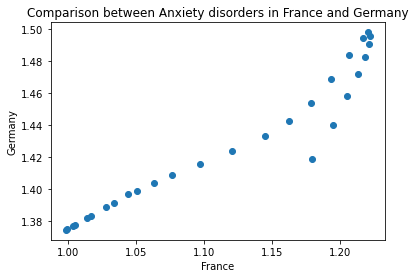

In [104]:
plt.title('Comparison between Drug use disorders (%) and Alcohol use disorders (%) in France')
plt.scatter(french_data['Drug use disorders (%)'], french_data['Alcohol use disorders (%)'])
plt.xlabel('France')
plt.ylabel('Germany')
plt.show()

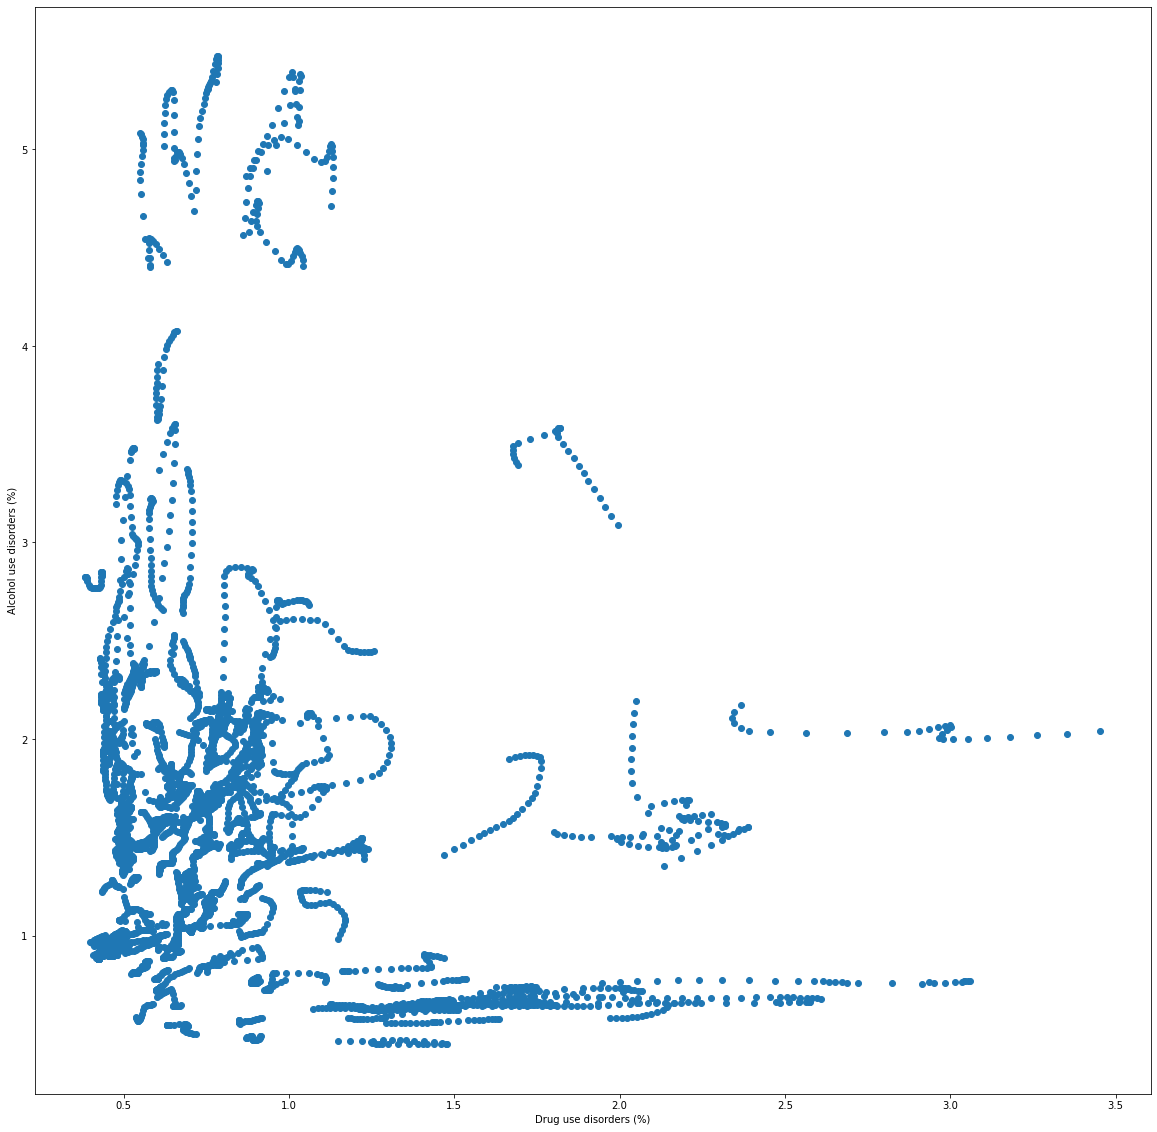

In [142]:
plt.figure(figsize=(20,20))
plt.scatter(data1['Drug use disorders (%)'], data1['Alcohol use disorders (%)'])
plt.xlabel('Drug use disorders (%)')
plt.ylabel('Alcohol use disorders (%)')
plt.show()

In [129]:
data1.corr()

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
Schizophrenia (%),1.000000,0.229418,0.683224,0.468782,0.406210,0.136628,-0.045339
Bipolar disorder (%),0.229418,1.000000,0.703004,0.653836,0.349050,0.117786,0.062072
Eating disorders (%),0.683224,0.703004,1.000000,0.675749,0.420120,0.200886,0.031532
Anxiety disorders (%),0.468782,0.653836,0.675749,1.000000,0.594707,0.346911,-0.155527
Drug use disorders (%),0.406210,0.349050,0.420120,0.594707,1.000000,0.320756,-0.158448
Depression (%),0.136628,0.117786,0.200886,0.346911,0.320756,1.000000,0.047439
Alcohol use disorders (%),-0.045339,0.062072,0.031532,-0.155527,-0.158448,0.047439,1.000000


<AxesSubplot:>

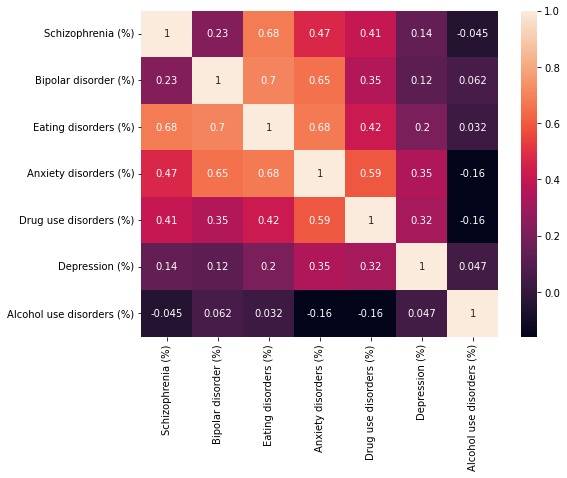

In [130]:
import seaborn as sb
plt.figure(figsize=(8,6))
sb.heatmap(data1.corr(), annot=True)

In [138]:
data1.query('Country == "Italy" & Year == "2017"')

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
2379,Italy,ITA,2017,0.236197,0.946257,0.626784,5.626121,1.148015,3.464256,0.462937


In [148]:
prova=data1.query('Country == "Italy" | Country == "France" | Country == "Germany" | Country == "Spain"')

In [149]:
prova

,Country,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
1680,France,FRA,1990,0.256002,0.958319,0.501159,6.588653,1.044027,4.600998,1.397252
1681,France,FRA,1991,0.256748,0.961265,0.504938,6.600836,1.027922,4.564180,1.388861
1682,France,FRA,1992,0.257440,0.964098,0.508502,6.614875,1.013919,4.531907,1.382412
1683,France,FRA,1993,0.258021,0.966578,0.512079,6.628746,1.004686,4.505929,1.377867
1684,France,FRA,1994,0.258469,0.968580,0.515091,6.641236,0.998973,4.488330,1.375352
...,...,...,...,...,...,...,...,...,...,...
4503,Spain,ESP,2013,0.280297,0.976705,0.729313,5.275748,1.426120,3.480882,0.900545
4504,Spain,ESP,2014,0.280512,0.976732,0.732196,5.277069,1.435110,3.491550,0.898279
4505,Spain,ESP,2015,0.280801,0.976793,0.733379,5.278341,1.446569,3.506859,0.895117
4506,Spain,ESP,2016,0.281139,0.976831,0.733354,5.279232,1.456723,3.522661,0.890794


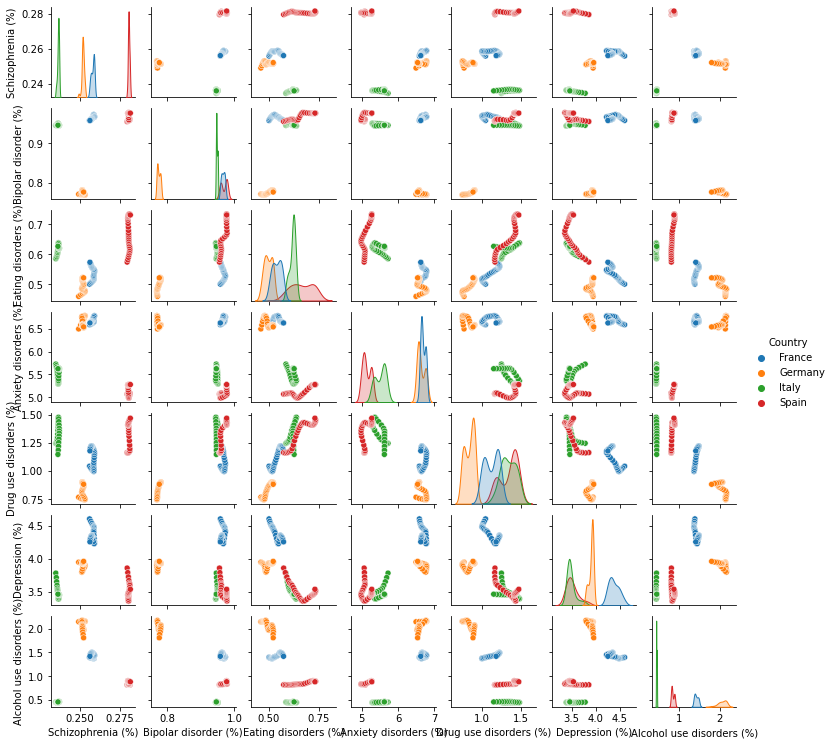

In [150]:
import seaborn as sns
sns.pairplot(prova, hue='Country', height=1.5)

In [151]:
from sklearn.cluster import KMeans

In [152]:
square_distances = []
x = data1[['Anxiety disorders (%)', 'Depression (%)']]
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x)
    square_distances.append(km.inertia_)

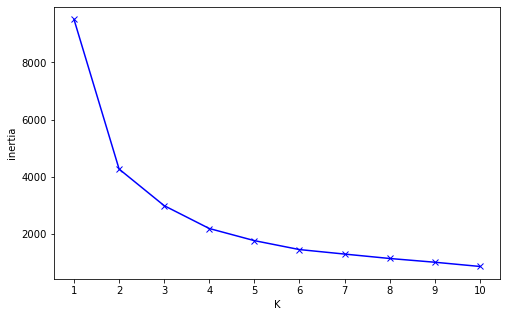

In [153]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), square_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('inertia')
plt.xticks(list(range(1,11)))
plt.show()

In [154]:
km = KMeans(n_clusters=5, random_state=42)
y_pred = km.fit_predict(x)

No handles with labels found to put in legend.


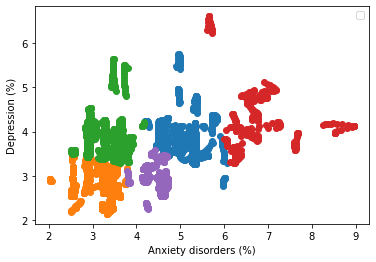

In [156]:
plt.figure(figsize=(6,4))
#labels = ['normal', 'cheap', 'poor', 'risky', 'safe']
for i in range(5):
    plt.scatter(x.loc[y_pred==i, 'Anxiety disorders (%)'], x.loc[y_pred==i, 'Depression (%)'], 
                #label=labels[i]
               )
plt.xlabel('Anxiety disorders (%)')
plt.ylabel('Depression (%)')
plt.legend()
plt.show()

In [172]:
data2FM_Italy=data2[data2['Country']=='Italy']

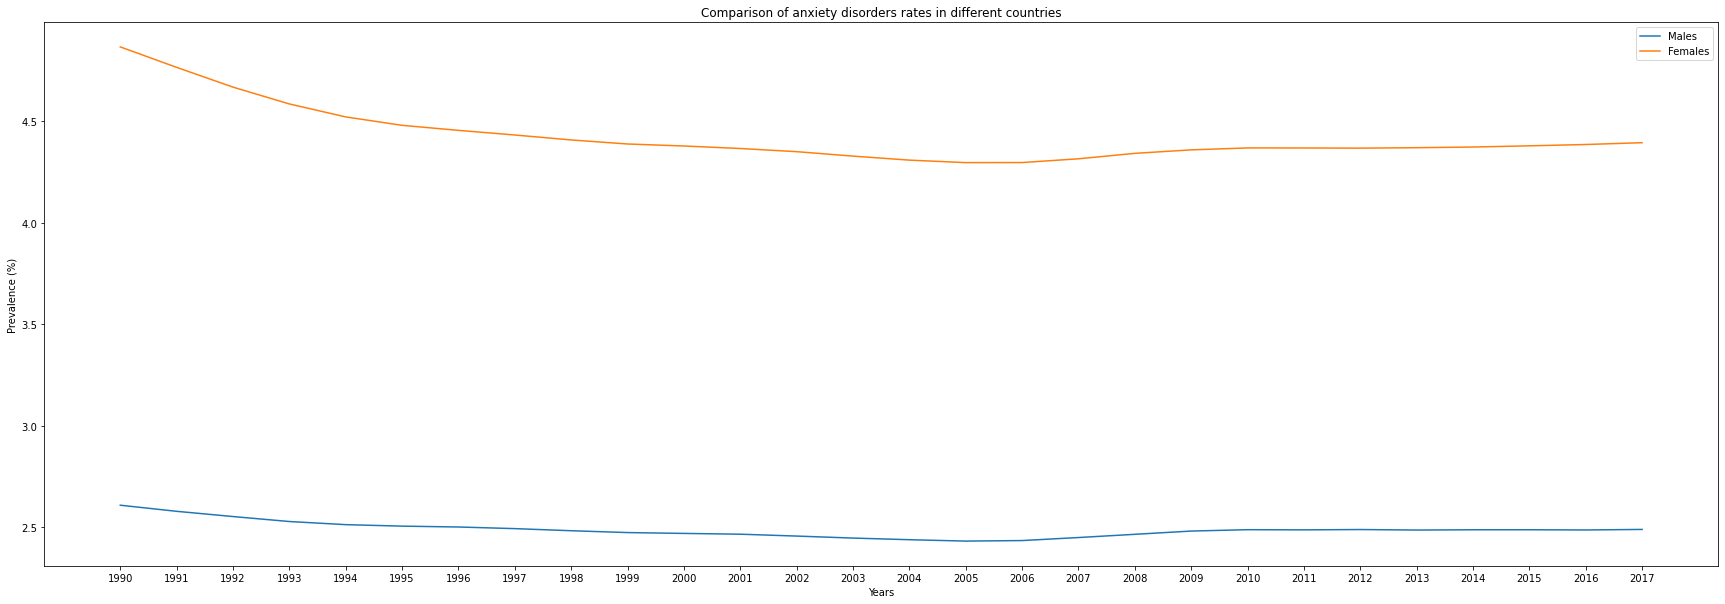

In [173]:
plt.figure(figsize=(30, 10))
plt.title('Comparison of prevalence in different countries')
plt.plot(data2FM_Italy['Year'], data2FM_Italy['Prevalence in males (%)'], label='Males')
plt.plot(data2FM_Italy['Year'], data2FM_Italy['Prevalence in females (%)'], label='Females')
plt.xlabel('Years')
plt.ylabel('Prevalence (%)')
plt.legend()
plt.show()

In [178]:
data2FM_World=data2[data2['Country']=='World']

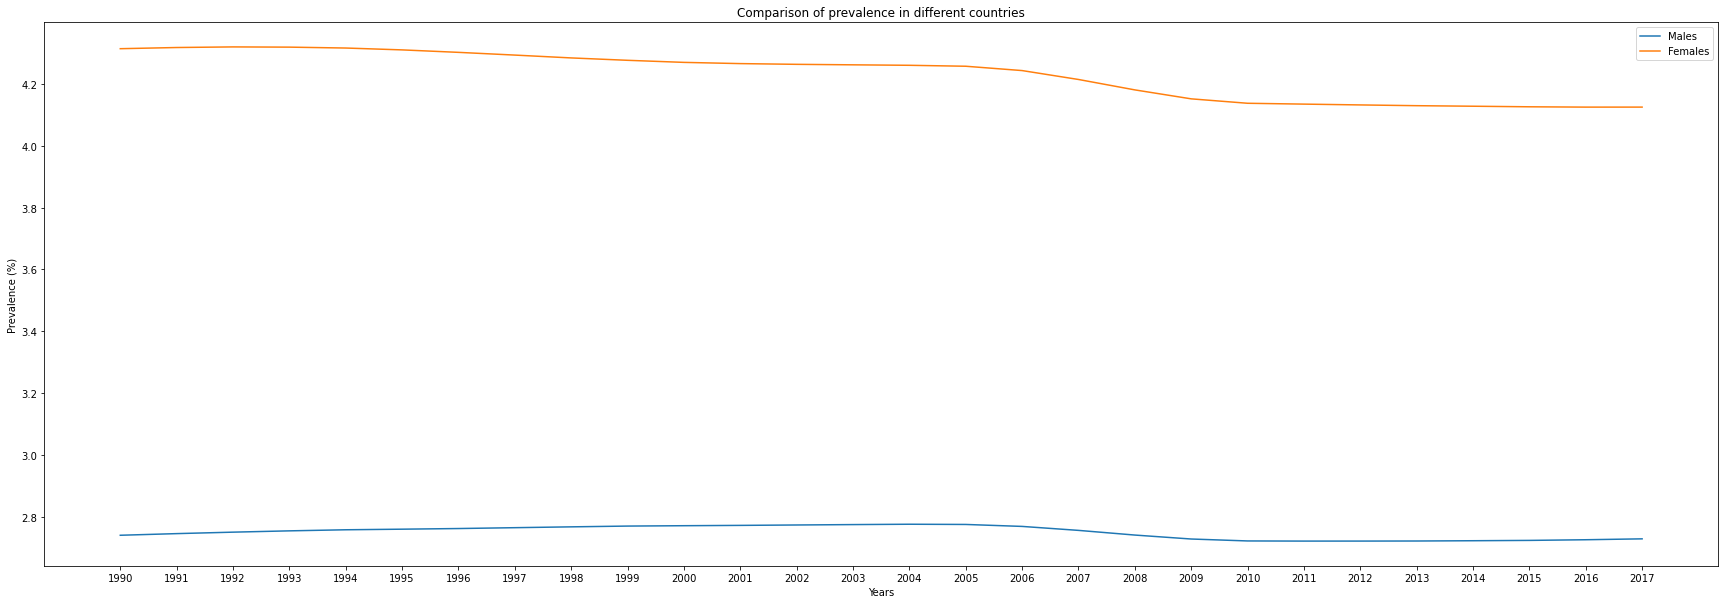

In [179]:
plt.figure(figsize=(30, 10))
plt.title('Comparison of prevalence in different countries')
plt.plot(data2FM_World['Year'], data2FM_World['Prevalence in males (%)'], label='Males')
plt.plot(data2FM_World['Year'], data2FM_World['Prevalence in females (%)'], label='Females')
plt.xlabel('Years')
plt.ylabel('Prevalence (%)')
plt.legend()
plt.show()

In [181]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
"Suicide rate (deaths per 100,000 individuals)",5404.0,1.188898e+01,8.398265e+00,1.526792,6.442549e+00,1.011382e+01,1.459028e+01,9.883170e+01
"Depressive disorder rates (number suffering per 100,000)",5404.0,3.326352e+03,6.375225e+02,2065.451870,2.836971e+03,3.320470e+03,3.716903e+03,6.096438e+03
Population,5404.0,3.300231e+07,1.279417e+08,45000.000000,1.591750e+06,6.703000e+06,2.108050e+07,1.421022e+09


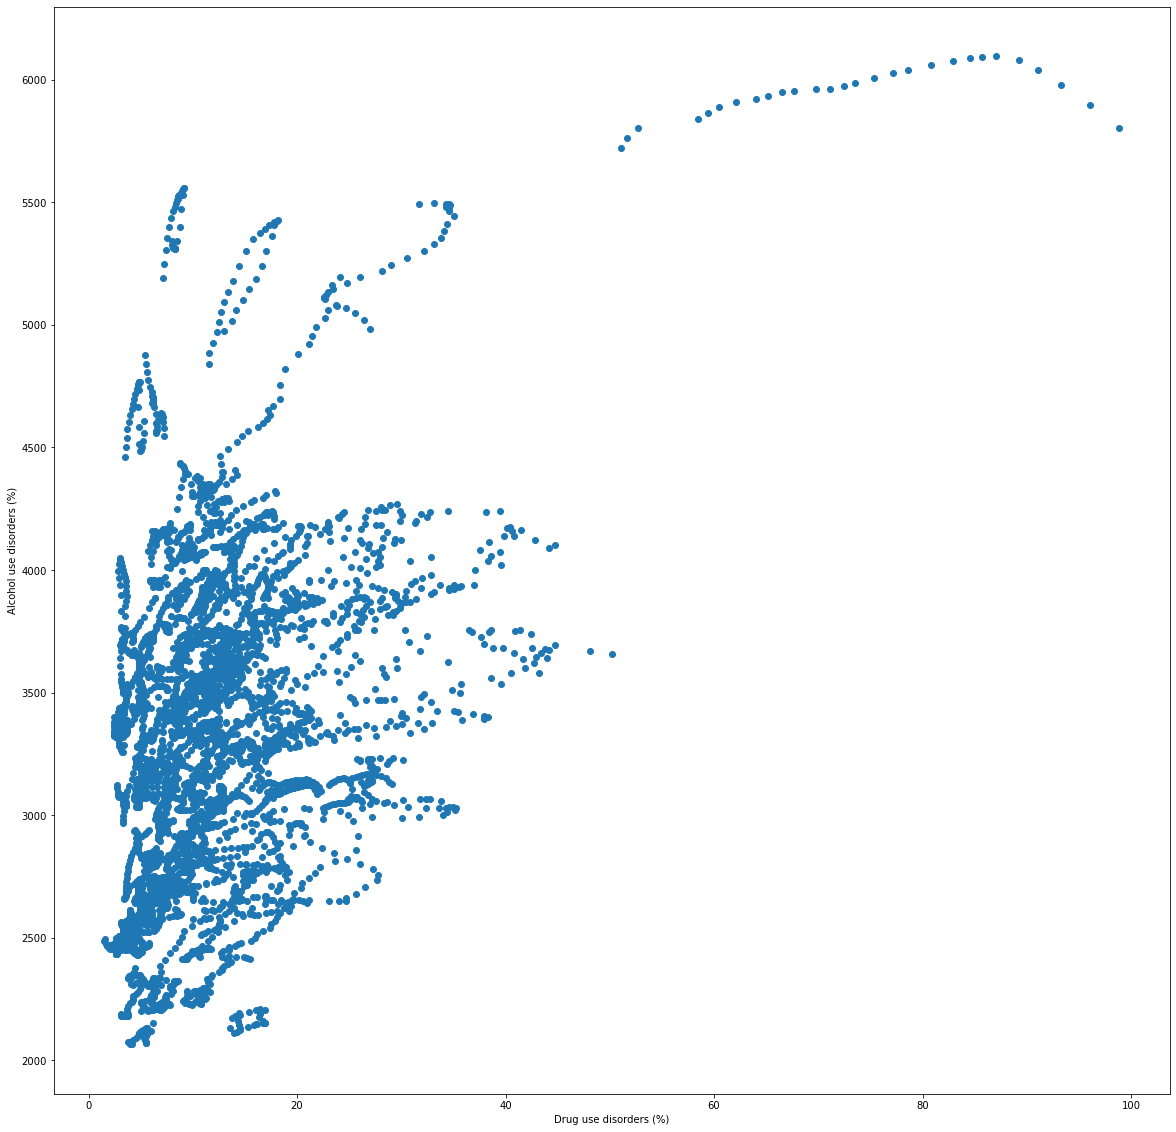

In [182]:
plt.figure(figsize=(20,20))
plt.scatter(data3['Suicide rate (deaths per 100,000 individuals)'], data3['Depressive disorder rates (number suffering per 100,000)'])
plt.xlabel('Suicide rate (deaths per 100,000 individuals)')
plt.ylabel('Depressive disorder rates (number suffering per 100,000)')
plt.show()

In [184]:
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression),5432.0,2.211080e+06,1.613339e+07,930.721636,52557.380473,195662.725563,633183.19764,2.644556e+08
